In [1]:
# !nvidia-smi

In [2]:
!pip install -q jupyter-black

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cubinlinker, which is not installed.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 23.8.0 requires ptxcompiler, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
keras-cv 0.8.2 requires keras-core, which is not installed.
keras-nlp 0.8.2 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
cudf 23.8.0 requires cuda-python<12.0a0,>=11.7.1, but you have cuda-python 12.4.0 which is incompatible.
cudf 23.8.0 requires pandas<1.6.0dev0,>=1.3, but you have pandas 2.1.4 which is incompatible.
cudf 23.8.0 requires protobuf<5,>=4.21, but you have protobuf 3.20.3 which is incompatible.
cuml 23.8.0 r

In [3]:
# import cudf

In [4]:
import jupyter_black

jupyter_black.load()

<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>Basic Imports</h2>
</div>

In [5]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import os

for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [6]:
# torch.cuda.get_device_properties(0).total_memory / 1e9

<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>SpaCy</h2>
    <h4 style="color: #FFA07A">We are going to use the spacy,spacy_cleaner for cleaning of the text (It's a cython lib , which is faster in preprocessing the text)</h5>
    <h2>Spacy_Cleaner</h2>
    <h4 style="color: #FFA07A">Spacy cleaner will run upon the Spacy's pre built language model as Pipeline to make the cleaning the text very efficiently and easily</h5>
</div>


In [7]:
!pip install spacy_cleaner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 15.9 MB/s eta 0:00:00


In [8]:
import spacy
import spacy_cleaner
from spacy_cleaner.processing import removers, mutators

<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>Getting the Data</h2>
</div>

In [9]:
%%time
train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

CPU times: user 186 ms, sys: 10.7 ms, total: 196 ms
Wall time: 232 ms


<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>Analysis of data</h2>
</div>

In [10]:
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [11]:
len(train)

7613

In [12]:
max(train["id"])

10873

In [13]:
train["keyword"].value_counts()

keyword
fatalities               45
armageddon               42
deluge                   42
harm                     41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64

In [14]:
train["location"].value_counts()

location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
Some pum pum             1
Paulton, England         1
SEA Server               1
todaysbigstock.com       1
???????? ?????????.      1
Name: count, Length: 3341, dtype: int64

In [15]:
train = train[train.columns[3:]]  # Removed Other columns
test = test[test.columns[3:]]

In [16]:
train

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [17]:
test

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan
...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,Storm in RI worse than last hurricane. My city...
3260,Green Line derailment in Chicago http://t.co/U...
3261,MEG issues Hazardous Weather Outlook (HWO) htt...


In [18]:
train.dtypes

text      object
target     int64
dtype: object

In [19]:
train["text"] = train["text"].str.lower()
test["text"] = test["text"].str.lower()

In [20]:
test.head(2)

,text
0,just happened a terrible car crash
1,"heard about #earthquake is different cities, s..."


In [21]:
train.head(2)

,text,target
0,our deeds are the reason of this #earthquake m...,1
1,forest fire near la ronge sask. canada,1


<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>SpaCy's pre-built nlp model</h2>
</div>

In [22]:
# Setting up the pipeline to clean the data using spacy
nlp = spacy.load("en_core_web_sm")
nlp

<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>SpaCy_Cleaner Pipeline setup</h2>
</div>

In [23]:
pipeline = spacy_cleaner.Cleaner(
    nlp,  # pre-built language model
    removers.remove_email_token,
    removers.remove_punctuation_token,
    removers.remove_stopword_token,
    removers.remove_url_token,
    removers.remove_number_token,
    mutators.mutate_lemma_token,
)

In [24]:
train.head(5)

,text,target
0,our deeds are the reason of this #earthquake m...,1
1,forest fire near la ronge sask. canada,1
2,all residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,just got sent this photo from ruby #alaska as ...,1


<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>Cleaning the data</h2>
</div>

In [25]:
%%time
train["text"] = pipeline.clean(train["text"])

Cleaning Progress: 100%|██████████| 7613/7613 [00:22<00:00, 335.34it/s]

CPU times: user 22.6 s, sys: 66.6 ms, total: 22.7 s
Wall time: 22.7 s


In [26]:
train.head(5)  # Now we got the clean texts

,text,target
0,deed reason earthquake allah forgive,1
1,forest fire near la ronge sask canada,1
2,resident ask shelter place notify officer evac...,1
3,people receive wildfire evacuation order calif...,1
4,get send photo ruby alaska smoke wildfire pour...,1


In [27]:
# when you further check for somes senteces like train[100],[102], it will has some special characters
# let us remove the tags and unwanted symbols to make it more clean
import re

SymbolRemover = lambda x: re.sub("[#=><\/.]", "", x)

TagRemover = lambda word: re.sub("@\w+", "", word)

train["text"] = train["text"].apply(SymbolRemover)

train["text"] = train["text"].apply(TagRemover)

In [28]:
# removing for test data
test["text"] = test["text"].apply(SymbolRemover)

test["text"] = test["text"].apply(TagRemover)

In [29]:
!pip install emojis

In [30]:
# checking in case for any emojis


def has_emoji(text):
    emoji_pattern = re.compile("[\U00010000-\U0010ffff]")
    return emoji_pattern.search(text) is not None

In [31]:
print(train["text"].apply(has_emoji).value_counts())
print(test["text"].apply(has_emoji).value_counts())

text
False    7613
Name: count, dtype: int64
text
False    3263
Name: count, dtype: int64


In [32]:
# So No emojis were found
# Now let's dive into the POS- Parts of Speech which is very important for meaning of the sentences
# I came to know ,when I go through some papers related the sentiment of the words given below

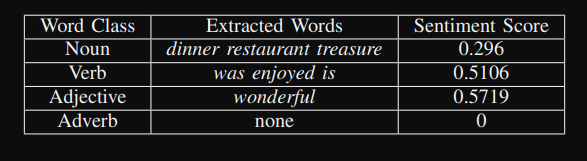

## See the Noun,Verb,Adjective has more values in determining the meaning of the sentences

https://sentic.net/sentire2021chen.pdf

In [33]:
# so we will extract the pos from the sentences and make it combined


def extract_words(text):
    doc = nlp(text)
    verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
    adjectives = [token.lemma_ for token in doc if token.pos_ == "ADJ"]
    nouns = [token.lemma_ for token in doc if token.pos_ == "NOUN"]
    return " ".join(verbs + adjectives + nouns)

In [34]:
# testing the fn
extract_words(train["text"][100])

'die kill bahrain police road accident explosion'

In [35]:
%%time
train["text"] = train["text"].apply(extract_words)
test["text"] = test["text"].apply(extract_words)

CPU times: user 1min 19s, sys: 43.4 ms, total: 1min 19s
Wall time: 1min 19s


In [36]:
print(train["text"][4])
print(train["target"][4])
print(test["text"][40])

get send photo smoke wildfire pour school
1
say meet super accident week-


In [37]:
!ls

__notebook__.ipynb


<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h3>Using the pre-build model from Hugging face(Transformers) for Classification</h3>
</div>

In [38]:
# Let's write the logic for the Model in pytorch
from transformers import (
    AutoTokenizer,
    DataCollator,
    DataCollatorWithPadding,
    AutoModelForSequenceClassification,
    Trainer,
    TrainingArguments,
)
from sklearn.model_selection import train_test_split
from datasets import Dataset, load_metric

# !pip install --upgrade transformers
import os

os.environ["WANDB_DISABLED"] = "True"

2024-04-12 18:02:06.094155: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-12 18:02:06.094249: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-12 18:02:06.232982: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>Using the "distilbert/distilbert-base-uncased" from transformers</h2>
    <a href=https://huggingface.co/transformers/v3.0.2/model_doc/auto.html#>Click to Refer for further<a>
</div>

In [39]:
model = "distilbert/distilbert-base-uncased"
learning_rate = 2e-5
epochs = 8

In [40]:
train_split, valid_split = train_test_split(
    train, test_size=0.2
)  # sppliting the data for train and valid

In [41]:
tokenizer = AutoTokenizer.from_pretrained(
    model
)  # Maping the TOkenizer for the model classification
train_ds = Dataset.from_pandas(train_split)
valid_ds = Dataset.from_pandas(valid_split)
test_ds = Dataset.from_pandas(test)


def process_token(example, tokenizer=tokenizer):
    return tokenizer(example["text"])


tokenized_train = train_ds.map(process_token)
tokenized_valid = valid_ds.map(process_token)
tokenized_test = test_ds.map(process_token)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

  0%|          | 0/6090 [00:00<?, ?ex/s]

  0%|          | 0/1523 [00:00<?, ?ex/s]

  0%|          | 0/3263 [00:00<?, ?ex/s]

In [42]:
tokenized_train[0]

{'text': 'pick beyhive',
 'target': 0,
 '__index_level_0__': 364,
 'input_ids': [101, 4060, 20289, 4048, 3726, 102],
 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [43]:
tokenized_test[0]

{'text': 'happen terrible car crash',
 'input_ids': [101, 4148, 6659, 2482, 5823, 102],
 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [44]:
columns_to_remove = ["__index_level_0__"]
train_dataset = tokenized_train.remove_columns(columns_to_remove)
valid_dataset = tokenized_valid.remove_columns(columns_to_remove)
test_dataset = tokenized_test

In [45]:
train_dataset[0]

{'text': 'pick beyhive',
 'target': 0,
 'input_ids': [101, 4060, 20289, 4048, 3726, 102],
 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [46]:
# valid_dataset[0]

In [47]:
train_dataset = train_dataset.rename_column("target", "label")
valid_dataset = valid_dataset.rename_column("target", "label")

In [48]:
train_dataset[0]

{'text': 'pick beyhive',
 'label': 0,
 'input_ids': [101, 4060, 20289, 4048, 3726, 102],
 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [49]:
test_dataset[0]

{'text': 'happen terrible car crash',
 'input_ids': [101, 4148, 6659, 2482, 5823, 102],
 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [50]:
def compute_metrics(eval_pred):
    load_acc = load_metric("accuracy")
    load_f1 = load_metric("f1")
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = load_acc.compute(predictions=predictions, references=labels)["accuracy"]
    f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
    print("Accuracy:" + acc, "F1:" + f1)
    return {"acc": acc, "f1": f1}

In [51]:
# train_dataset

<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>Training the DistiltBert model</h2>
</div>

In [52]:
model = AutoModelForSequenceClassification.from_pretrained(model)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
training_args = TrainingArguments(
    learning_rate=learning_rate,
    num_train_epochs=epochs,
    per_device_train_batch_size=16,
    weight_decay=0.01,
    output_dir="/kaggle/working/distilbert",
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False

In [53]:
trainer.args

TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=False,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=no,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'min_num_params': 0, 'xla': False, 'xla_fsdp_v2': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_la

In [54]:
trainer.train()

Step,Training Loss
500,0.486800
1000,0.365000
1500,0.279100
2000,0.192500
2500,0.150000
3000,0.116700


TrainOutput(global_step=3048, training_loss=0.26317209959655924, metrics={'train_runtime': 122.3456, 'train_samples_per_second': 398.216, 'train_steps_per_second': 24.913, 'total_flos': 214785020454408.0, 'train_loss': 0.26317209959655924, 'epoch': 8.0})

<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>Getting the Predictions</h2>
</div>

In [55]:
predictions = trainer.predict(test_dataset=test_dataset)

In [56]:
predictions.predictions[0]

array([-3.1181219,  2.9977524], dtype=float32)

In [57]:
predictions_Strength_Class = np.argmax(
    predictions.predictions, axis=1
)  # Return the indexof the max value class

In [58]:
predictions_Strength_Class  # Shows the label of our texts/tweets

array([1, 0, 1, ..., 1, 1, 1])

<div style="background-image: url('https://media.istockphoto.com/id/1341408852/video/colored-smoke-on-a-dark-background-blue-and-red-light-with-smoke.jpg?s=640x640&k=20&c=v2DQUY8IVbli_6FH_9KAs6YWRXlDdYiBJHfp7JFh7NY='); background-size: cover; background-position: center; border-radius: 10px; padding: 20px; color: #ffffff;">
    <h2>Making the Submission File</h2>
</div>

In [59]:
submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
submission["target"] = predictions_Strength_Class
submission = submission.set_index("id", drop=True)
submission.to_csv("/kaggle/working/submission.csv")

In [60]:
submission.head(5)

,target
id,
0,1
2,0
3,1
9,1
11,0
